In [1]:
import pandas as pd
import numpy as np

# SVM classification

### Receiving two largest clasters

In [2]:
clustered_data = pd.read_csv("clusters.csv")
d = clustered_data['Cluster'].value_counts().nlargest(2).index  # getting the indexes of the clusters with largest data
data = clustered_data[clustered_data['Cluster'].isin(d)]        # getting data by indexes
data.head(10)

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Cluster
0,0.0,0.0,1.0,1.0,0.186047,0.0,0.0,0.0,1.0,1.0,...,0.0,0.25,0.000000,0.100000,0.0,1.0,0.583333,0.8,1.000000,2
1,0.0,1.0,1.0,1.0,0.209302,0.0,0.0,0.0,1.0,0.0,...,0.0,0.50,0.100000,0.100000,0.0,1.0,0.583333,0.6,0.428571,1
3,0.0,1.0,1.0,1.0,0.127907,1.0,0.0,0.0,0.0,0.0,...,0.0,0.50,0.000000,0.000000,0.0,1.0,0.916667,0.6,0.714286,1
4,0.0,0.0,0.0,1.0,0.151163,1.0,0.0,1.0,1.0,1.0,...,0.0,0.50,0.000000,0.000000,1.0,0.0,0.750000,1.0,1.000000,2
6,0.0,1.0,0.0,1.0,0.174419,0.0,0.0,0.0,1.0,1.0,...,0.0,0.75,0.133333,0.066667,0.0,0.0,0.416667,0.8,0.714286,2
7,0.0,0.0,1.0,1.0,0.104651,1.0,0.0,0.0,1.0,1.0,...,0.0,0.50,1.000000,1.000000,1.0,0.0,0.916667,1.0,1.000000,1
9,0.5,1.0,1.0,1.0,0.232558,1.0,1.0,1.0,0.0,1.0,...,0.0,1.00,0.000000,1.000000,1.0,0.0,0.666667,0.8,0.000000,1
10,0.0,0.0,0.0,1.0,0.081395,0.0,0.0,0.0,1.0,1.0,...,0.0,0.25,0.166667,0.000000,0.0,0.0,0.250000,1.0,1.000000,2
11,0.0,1.0,0.0,1.0,0.186047,1.0,0.0,0.0,1.0,1.0,...,0.0,0.75,0.500000,0.500000,0.0,0.0,0.916667,0.8,0.857143,1
12,1.0,1.0,1.0,1.0,0.348837,1.0,1.0,0.0,1.0,1.0,...,0.0,1.00,0.100000,0.500000,1.0,0.0,0.833333,0.4,0.571429,1


### Train-Test split

In [3]:
from sklearn.model_selection import train_test_split

X, y = data.iloc[:,:-1], data.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.12, random_state=42)

In [4]:
print(y_train.size / y_test.size)

7.326015367727772


### Classification
Using SVM with Linear Cluster

In [5]:
from sklearn import svm

clf = svm.SVC()
clf.fit(X_train, y_train)

SVC()

### Prediction and accuracy check

In [6]:
y_result = clf.predict(X_test)

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_result)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.79%


### Visualization of classes and separating hiperplane

Due to disability to project 22 feature space to 2d, it was decided to train and visualise the model trained in 2d

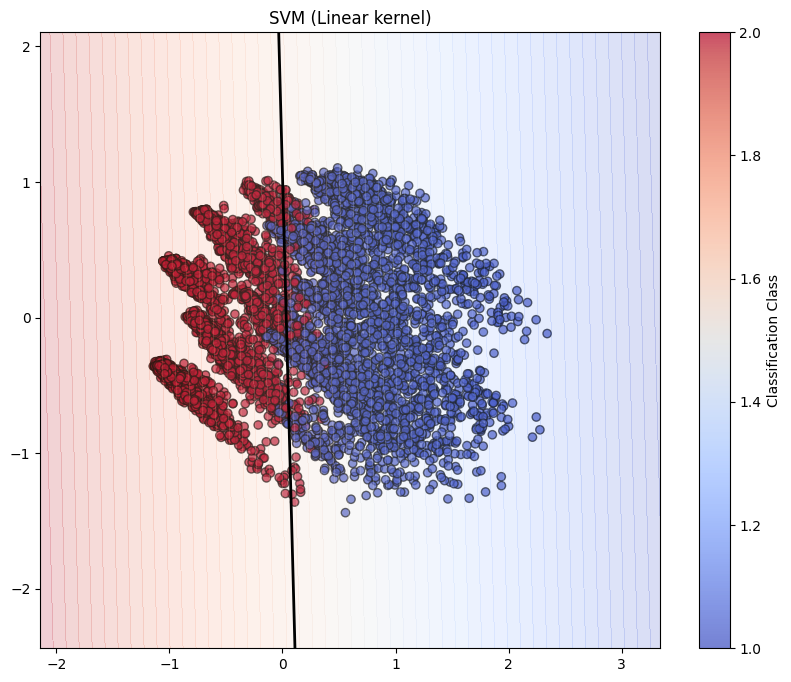

In [7]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn import svm

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.12, random_state=42)

clf = svm.SVC(kernel="linear", random_state=42)
clf.fit(X_train_pca, y_train)

xx, yy = np.meshgrid(np.linspace(X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1, 100),
                     np.linspace(X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1, 100))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))

scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='coolwarm', edgecolors='k', alpha=0.7)

plt.contour(xx, yy, Z, levels=[0], linewidths=2, colors='k')
plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), Z.max(), 50), cmap='coolwarm', alpha=0.2)

plt.title("SVM (Linear kernel)")
plt.colorbar(scatter, label='Classification Class')
plt.show()


H:\In common\Python\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


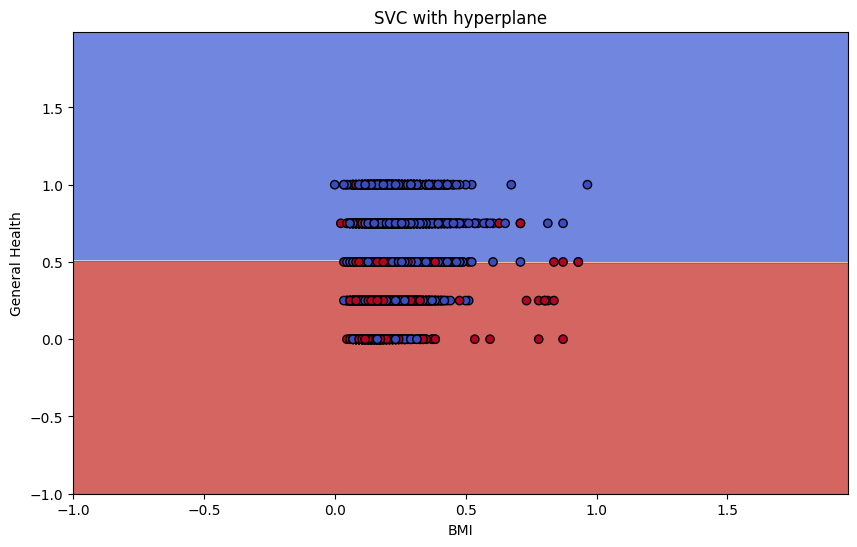

In [11]:
import numpy as np
import matplotlib.pyplot as plt

X_selected = X.iloc[:, [4, 14]]
X_train_selected = X_train.iloc[:, [4, 14]]
X_test_selected = X_test.iloc[:, [4, 14]]

clf_selected = svm.SVC(kernel='linear')
clf_selected.fit(X_train_selected, y_train)

x_min, x_max = X_selected.iloc[:, 0].min() - 1, X_selected.iloc[:, 0].max() + 1
y_min, y_max = X_selected.iloc[:, 1].min() - 1, X_selected.iloc[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = clf_selected.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
plt.scatter(X_selected.iloc[:, 0], X_selected.iloc[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel("BMI")
plt.ylabel("General Health")
plt.title("SVC with hyperplane")
plt.show()
